# Polynomial Regression Exercises

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston

## Problem 1: Creating and Visualizing data for 1 feature model

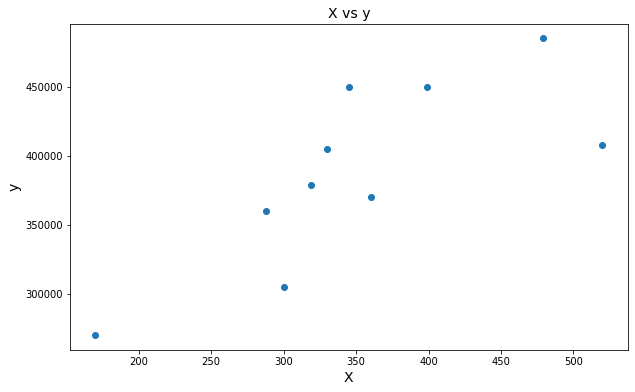

In [2]:
#Making and visualizing data
X=np.array([300,170,288,360,319,330,520,345,399,479]).reshape(-1,1)
y=np.array([305000,270000,360000,370000,379000,405000,407500,450000,450000,485000]).reshape(-1,1)

#Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.show()

- In the above plot we can see that distribution of data is somewhat not linear.

### Model 1: Linear Regression
$$y=\theta_0+\theta_1X$$

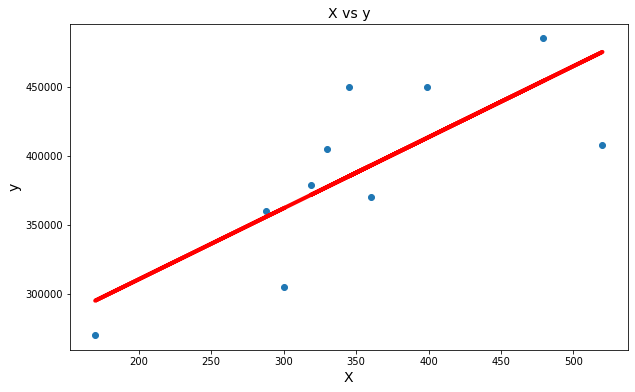

R_square score: 0.5889136638652293
theta_0: 207241.3942514915
theta_1: 515.4091331866339
Number of non-zero features: 1
CPU times: total: 250 ms
Wall time: 273 ms


In [3]:
%%time

model1=LinearRegression()
model1.fit(X,y)

#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X,model1.predict(X),color='red',linewidth=4)
plt.show()

print('R_square score:',model1.score(X,y))
print('theta_0:',model1.intercept_[0])
print('theta_1:',model1.coef_[0][0])
print('Number of non-zero features:',np.sum(model1.coef_ != 0))

### Model 2: Polynomial Regression with degree 2 polynomial
$$y=\theta_0+\theta_1X+\theta_2X^2$$

The implementation of polynomial regression is a two-step process. 
First, we transform our data into a polynomial using the PolynomialFeatures function from sklearn and,
then use linear regression to fit the parameters.

In [4]:
#Converting linear function to polynomial function of degree 2
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)
#X_poly is ndarray having three columns: 
#First one is a constant to represent X_0, 
#Second is X_1=X 
#Third is X_2=X**2, simply square of X
X_poly2

array([[1.00000e+00, 3.00000e+02, 9.00000e+04],
       [1.00000e+00, 1.70000e+02, 2.89000e+04],
       [1.00000e+00, 2.88000e+02, 8.29440e+04],
       [1.00000e+00, 3.60000e+02, 1.29600e+05],
       [1.00000e+00, 3.19000e+02, 1.01761e+05],
       [1.00000e+00, 3.30000e+02, 1.08900e+05],
       [1.00000e+00, 5.20000e+02, 2.70400e+05],
       [1.00000e+00, 3.45000e+02, 1.19025e+05],
       [1.00000e+00, 3.99000e+02, 1.59201e+05],
       [1.00000e+00, 4.79000e+02, 2.29441e+05]])

In [5]:
#Converting ndarray to DataFrame and dropping the constant (first column)
X_poly2=pd.DataFrame(X_poly2)
X_poly2=X_poly2.drop([0],axis=1)
X_poly2

,1,2
0,300.0,90000.0
1,170.0,28900.0
2,288.0,82944.0
3,360.0,129600.0
4,319.0,101761.0
5,330.0,108900.0
6,520.0,270400.0
7,345.0,119025.0
8,399.0,159201.0
9,479.0,229441.0


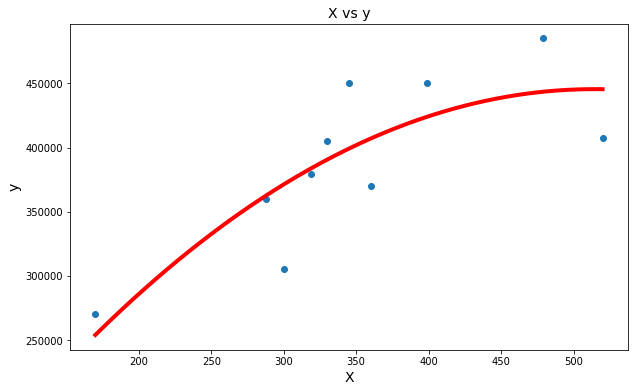

R_squared score: 0.6810985878421543
theta_0: 18030.177831701934
theta_1: [ 1.66223492e+03 -1.61588516e+00]
Number of non-zero features: 2


In [6]:
#now X_poly has two feature: X_1=X and X_2=X**2

#now fitting linear model to it
model2=LinearRegression()
model2.fit(X_poly2,y)

#generating data for line plot, for smoother curve
X_data=np.linspace(X.min(),X.max(),300).reshape(-1,1) 
X_data_poly2 = pd.DataFrame(poly2.fit_transform(X_data)).drop([0],axis=1)
X_data_poly2


#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
#plt.plot(X,model2.predict(X_poly2),color='red',linewidth=4)
plt.plot(X_data,model2.predict(X_data_poly2),color='red',linewidth=4)
plt.show()

print('R_squared score:',model2.score(X_poly2,y))
print('theta_0:',model2.intercept_[0])
print('theta_1:',model2.coef_[0])
print('Number of non-zero features:',np.sum(model2.coef_ != 0))

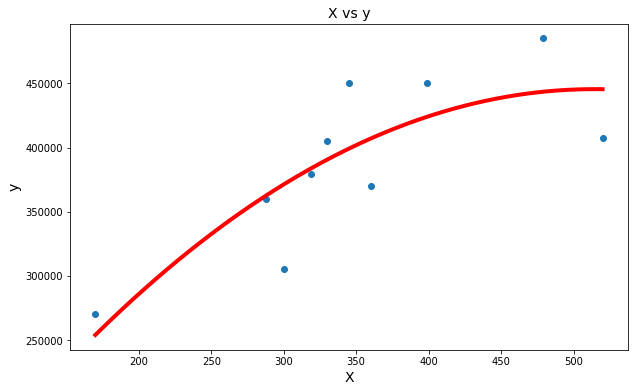

R_square score: 0.6810985878421543
CPU times: total: 250 ms
Wall time: 265 ms


In [7]:
%%time

#An alternate, shorter form form Model 2
model2a=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
model2a.fit(X,y)

#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X_data,model2a.predict(X_data),color='red',linewidth=4)
plt.show()

print('R_square score:',model2a.score(X,y))

### Model 3: Polynomial Regression with degree 9 polynomial
$$y=\theta_0+\theta_1X+\theta_2X^2+\theta_3X^3+\theta_4X^4+\theta_5X^5+\theta_6X^6+\theta_7X^7+\theta_8X^8+\theta_9X^9$$


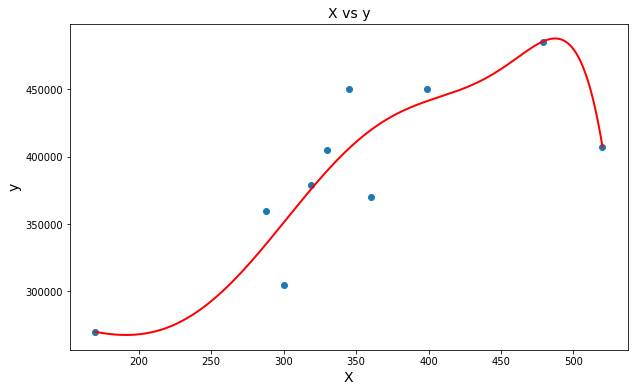

R_square score: 0.8125713702381752
theta_0: 295020.5992304608
theta_1: [-2.31472463e-15 -3.13544388e-09 -1.52984322e-10 -2.27463656e-08
 -1.93262975e-06  1.95439465e-08 -7.17953309e-11  1.15108836e-13
 -6.83705101e-17]
Number of non-zero features: 9
CPU times: total: 250 ms
Wall time: 243 ms


In [8]:
%%time

#Converting linear function to polynomial function of degree 9 using the longer method

poly3 = PolynomialFeatures(degree=9)
X_poly3 = poly3.fit_transform(X)

X_poly3=pd.DataFrame(X_poly3)
X_poly3=X_poly3.drop([0],axis=1)

model3=LinearRegression()
model3.fit(X_poly3,y)

#Generating data for line plot, for smoother curve
X_data=np.linspace(X.min(),X.max(),300).reshape(-1,1) 
X_data_poly3 = pd.DataFrame(poly3.fit_transform(X_data)).drop([0],axis=1)

#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X_data,model3.predict(X_data_poly3),color='red',linewidth=2)
plt.show()

print('R_square score:',model3.score(X_poly3,y))
print('theta_0:',model3.intercept_[0])
print('theta_1:',model3.coef_[0])
print('Number of non-zero features:',np.sum(model3.coef_ != 0))

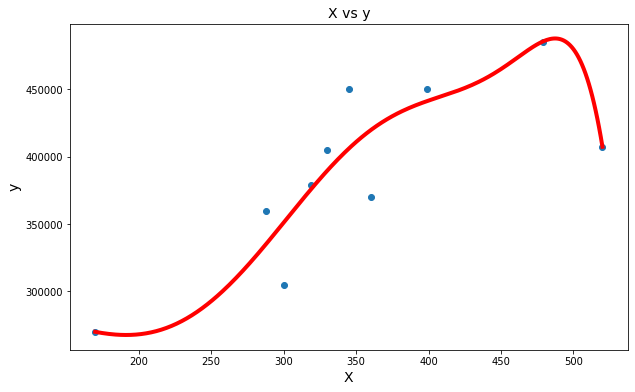

R_squared score: 0.8125713702367907
CPU times: total: 203 ms
Wall time: 245 ms


In [9]:
%%time

#An alternate, shorter form form Model 3
model3a=make_pipeline(PolynomialFeatures(degree=9),LinearRegression())
model3a.fit(X,y)

#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X_data,model3a.predict(X_data),color='red',linewidth=4)
plt.show()

print('R_squared score:',model3a.score(X,y))

## Problem 2: Creating and Visualizing data for Multi-feature model
### Revisiting the Boston house pricing example again
- The models in Problem 2 are number 4 and 5 just to avoid name clashes with models of problem 1.

In [10]:
#Loading and visualizing data
boston_dataset = load_boston()
dataset = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
dataset['PRICE'] = boston_dataset.target
target = dataset['PRICE']
features = dataset.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

C:\Users\DELL LATITUDE E 5470\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative data

### Model 4: Linear Regression

In [11]:
%%time

model4 = LinearRegression()
model4.fit(X_train, y_train)

print('Training data r-square:', model4.score(X_train, y_train))
print('Test data r-square:', model4.score(X_test, y_test))
print('Number of non-zero features:',np.sum(model4.coef_ != 0))

Training data r-square: 0.750121534530608
Test data r-square: 0.6709339839115636
Number of non-zero features: 13
CPU times: total: 15.6 ms
Wall time: 8.98 ms


### Model 5: Polynomial Regression 

In [12]:
%%time

deg=9 #try 3
X_train_poly2=PolynomialFeatures(degree=2).fit_transform(X_train)
X_train_poly2=pd.DataFrame(X_train_poly2)
X_train_poly2=X_train_poly2.drop([0],axis=1)
model5=LinearRegression()
model5.fit(X_train_poly2,y_train)

print('Training data r-square:', model5.score(X_train_poly2, y_train))
X_test_poly2=PolynomialFeatures(degree=deg).fit_transform(X_test)
X_test_poly2=pd.DataFrame(X_test_poly2)
X_test_poly2=X_test_poly2.drop([0],axis=1)
print('Test data r-square:', model5.score(X_test_poly2, y_test))
print('Number of non-zero features:',np.sum(model5.coef_ != 0))

Training data r-square: 0.9319230461477532


ValueError: X has 497419 features, but LinearRegression is expecting 104 features as input.